# Customer Personality Analysis

## Autor: Perez Lopez Juan Carlos

# Planteamiento del problema

El Análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a las empresas a comprender mejor a sus clientes y facilita la adaptación de sus productos según las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a adaptar su producto en función de sus clientes objetivo de diferentes segmentos. Por ejemplo, en lugar de invertir en comercializar un nuevo producto a todos los clientes de su base de datos, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprarlo y comercializarlo únicamente a ese segmento en particular.


##Contenido
### Atributos

**Gente**

* ID: Identificador único del cliente
* Year_Birth (Año_Nacimiento): Año de nacimiento del cliente
* Education: Nivel de educación del cliente
* Marital_Status (Estado civil): Estado civil del cliente
* Income (Ingresos): Ingresos familiares anuales del cliente
* Kidhome: Número de niños en el hogar del cliente
* Teenhome: Número de adolescentes en el hogar del cliente
* Dt_Customer: Fecha de alta del cliente en la empresa
* Recency (Recencia): Número de días desde la última compra del cliente
* Complain (Queja): 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

**Productos**

* MntWines: Cantidad gastada en vino en los últimos 2 años
* MntFruits: Cantidad gastada en frutas en los últimos 2 años
* MntMeatProducts: Cantidad gastada en carne en los últimos 2 años
* MntFishProducts: Cantidad gastada en pescado en los últimos 2 años
* MntSweetProducts: Cantidad gastada en dulces en los últimos 2 años
* MntGoldProds: Cantidad gastada en oro en los últimos 2 años

**Promoción**

* NumDealsPurchases: Número de compras realizadas con descuento
* AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario
* AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2da campaña, 0 en caso contrario
* AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario
* AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ta campaña, 0 en caso contrario
* AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario
* Response (Respuesta): 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

**Lugar**

* NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa
* NumCatalogPurchases: Número de compras realizadas mediante un catálogo
* NumStorePurchases: Número de compras realizadas directamente en tiendas
* NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes

### Preprocesamiento de datos

**Importamos las bibliotecas necesarias**

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

**Carga el dataset**

In [2]:
data = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
# cantidad de registros:
print(f'Cantidad de registros: {len(data)}')

Cantidad de registros: 2240


In [4]:
# información de las columnas:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# cantidad de registros duplicados:
print(f'Cantidad de registros duplicados: {data.duplicated().sum()}')

Cantidad de registros duplicados: 0


In [6]:
# Valores nulos por columna:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


De los resultados anteriores, podemos decir lo siguiente:

* Hay valores perdidos en los ingresos con un total de 24 registros.
* Dt_Customer, que indica la fecha en que un cliente se unió a la base de datos, no se analiza como DateTime.
* Hay algunas características categóricas en el dataframe, ya que hay algunas características en dtype: object . Por lo tanto, tendremos que codificarlas en formas numéricas más adelante.
* En cuanto a los valores que faltan, voy a eliminar las filas que tienen valores de ingresos que faltan.

In [7]:
# Eliminando registros con valores nulos:
data.dropna(inplace=True)
print("Número de registros despues de eliminar los registros con valores faltantes:", len(data))

Número de registros despues de eliminar los registros con valores faltantes: 2216


Voy a crear una característica a partir de "Dt_Customer" que indique el número de días que un cliente lleva registrado en la base de datos de la empresa. Sin embargo, para simplificar, voy a tomar este valor en relación con el cliente más reciente del registro.

Por lo tanto, para obtener los valores, debo comprobar las fechas más recientes y más antiguas registradas.

In [8]:
# cambiando el formato de la columna Dt_Customer que tiene la forma de día - mes - año a año - mes - día usando to_datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
# Fechas del cliente más reciente y del cliente más antiguo registrados.
print("Fecha de inscripción del cliente más reciente en los registros:",max(dates))
print("Fecha de inscripción del cliente más antiguo en los registros:",min(dates))

Fecha de inscripción del cliente más reciente en los registros: 2014-06-29
Fecha de inscripción del cliente más antiguo en los registros: 2012-07-30


In [10]:
# Verificando si la conversión de Dt_Customer a datetime fue exitosa:
print(data['Dt_Customer'].dtype)

datetime64[ns]


Creación de una característica o columna (Customer_For) para indicar el número de días que los clientes comenzaron a comprar en la tienda en relación con la última fecha registrada.

In [11]:
days = []
d1 = max(dates) # considerándolo como el cliente más nuevo
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,13910400000000000


Ahora exploraremos los valores únicos en las características categóricas para obtener una idea clara de los datos.

In [13]:
print("Total de categorías en la característica Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total de categorías en la característica Education:\n", data["Education"].value_counts())

otal de categorías en la característica Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total de categorías en la característica Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**Se puede observar que:**
* el estado civil predominante de los clientes es Married con un total de 857.
* el nivel de educación predominante de los clientes es Graduation con un total de  1116

**A continuación, realizaré los siguientes pasos para diseñar algunas características nuevas:**

* Extraer la "Edad" (age) de un cliente a partir del "Year_Birth", que indica el año de nacimiento de la persona en cuestión.
* Crear otra característica "Gasto" (Spent) que indique el importe total gastado por el cliente en diversas categorías a lo largo de dos años.
* Crear otra característica "Vive_con" (Living_With) a partir de "Estado_civil" (Marital_Status) para extraer la situación de convivencia de las parejas.
* Crear una característica "Hijos" (Children) para indicar el número total de hijos en un hogar, es decir, niños y adolescentes.
* Para obtener una mayor claridad sobre el hogar, crear una característica que indique el "Tamaño de la familia" (Family_Size).
* Crear una característica "Es padre" (Is_Parent) para indicar la condición de padre.
* Por último, crearé tres categorías en "Educación" (Education) simplificando sus recuentos de valores.
* Eliminar algunas de las características redundantes.

In [14]:
#Ingeniería de características
#Edad del cliente actual
data["Age"] = 2025-data["Year_Birth"]

#Gasto total en diversos artículos
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Derivación de la situación de convivencia según el estado civil "Solo" (alone)
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Característica que indica el número total de hijos que viven en el hogar
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Característica para el total de miembros del hogar
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Característica relativa a la paternidad
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmentación de los niveles educativos en tres grupos
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Para mayor claridad
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Eliminando algunas de las características redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

/tmp/ipython-input-14-3326784719.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


In [15]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


Las estadísticas anteriores muestran algunas discrepancias entre la renta media y la edad media, y la renta máxima y la edad máxima.

* La edad máxima es de 132 años, ya que he calculado la edad que tendría hoy (es decir, en 2025) y los datos son antiguos.

* Debo analizar los datos desde una perspectiva más amplia. Voy a representar gráficamente algunas de las características seleccionadas.

Gráfico relativo de algunas características seleccionadas: un subconjunto de datos


<Figure size 640x480 with 0 Axes>

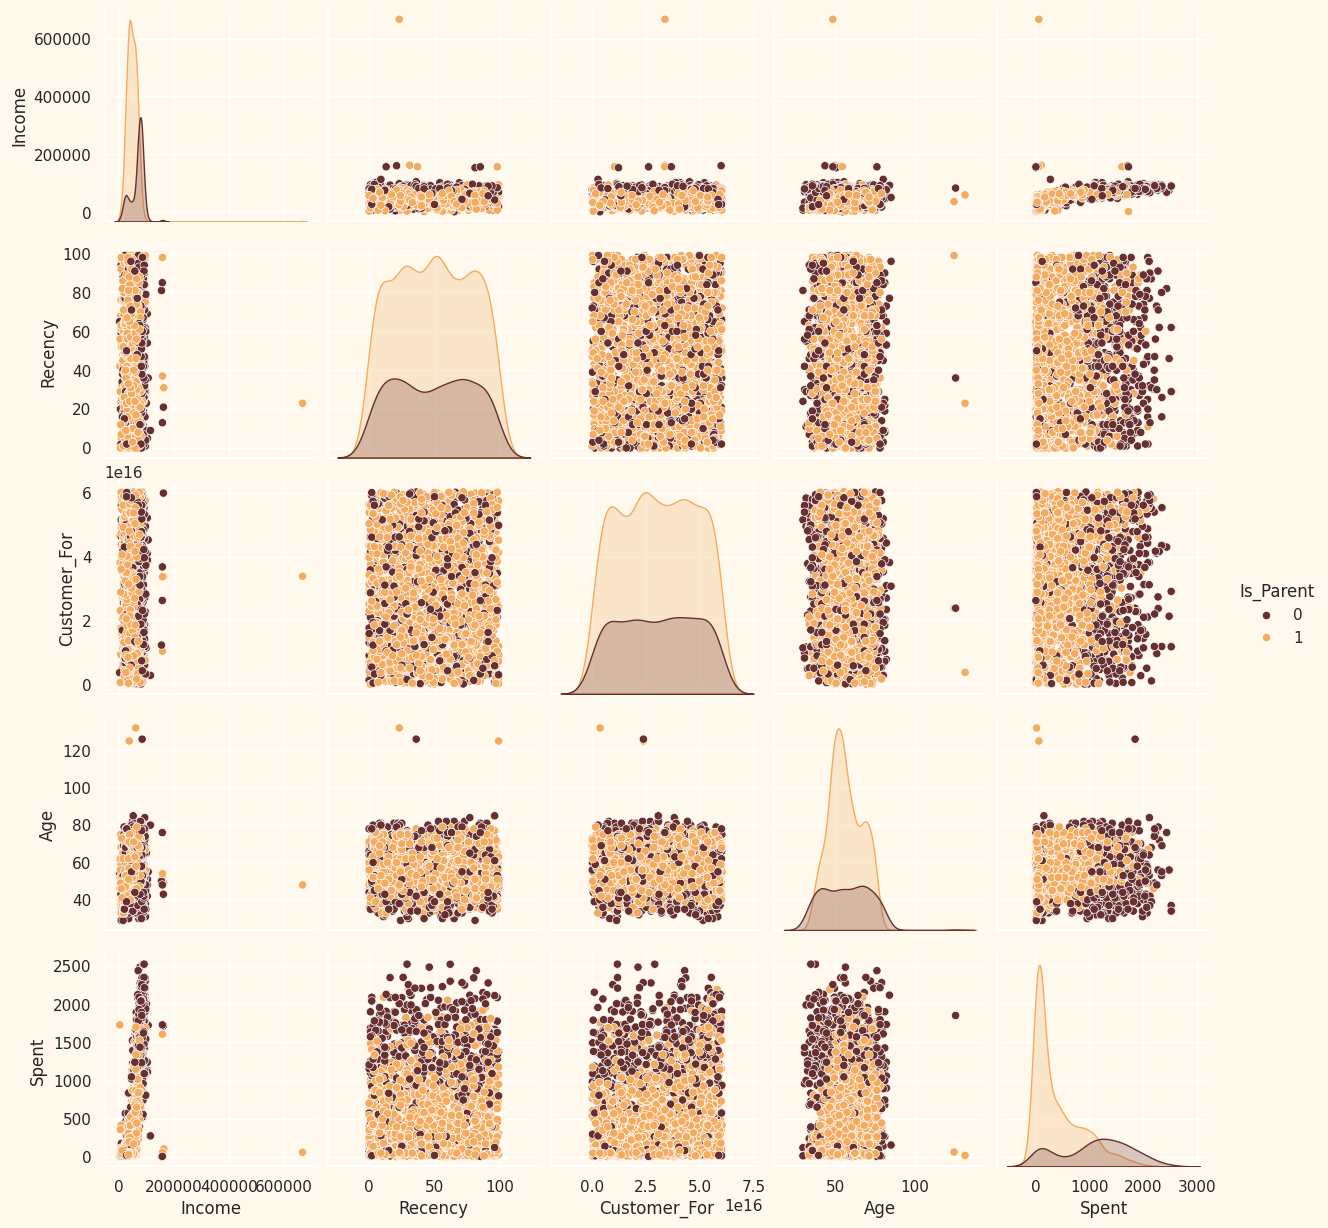

In [16]:
#Para trazar algunas características seleccionadas
#Configuración de las preferencias de colores
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Trazado de las siguientes características
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Gráfico relativo de algunas características seleccionadas: un subconjunto de datos")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [17]:
# Eliminar los valores atípicos estableciendo un límite máximo para la edad y los ingresos.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("El número total de puntos de datos tras eliminar los valores atípicos es:", len(data))

El número total de puntos de datos tras eliminar los valores atípicos es: 2212


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

**Correlación entre las características. (Excluyendo los atributos categóricos)**

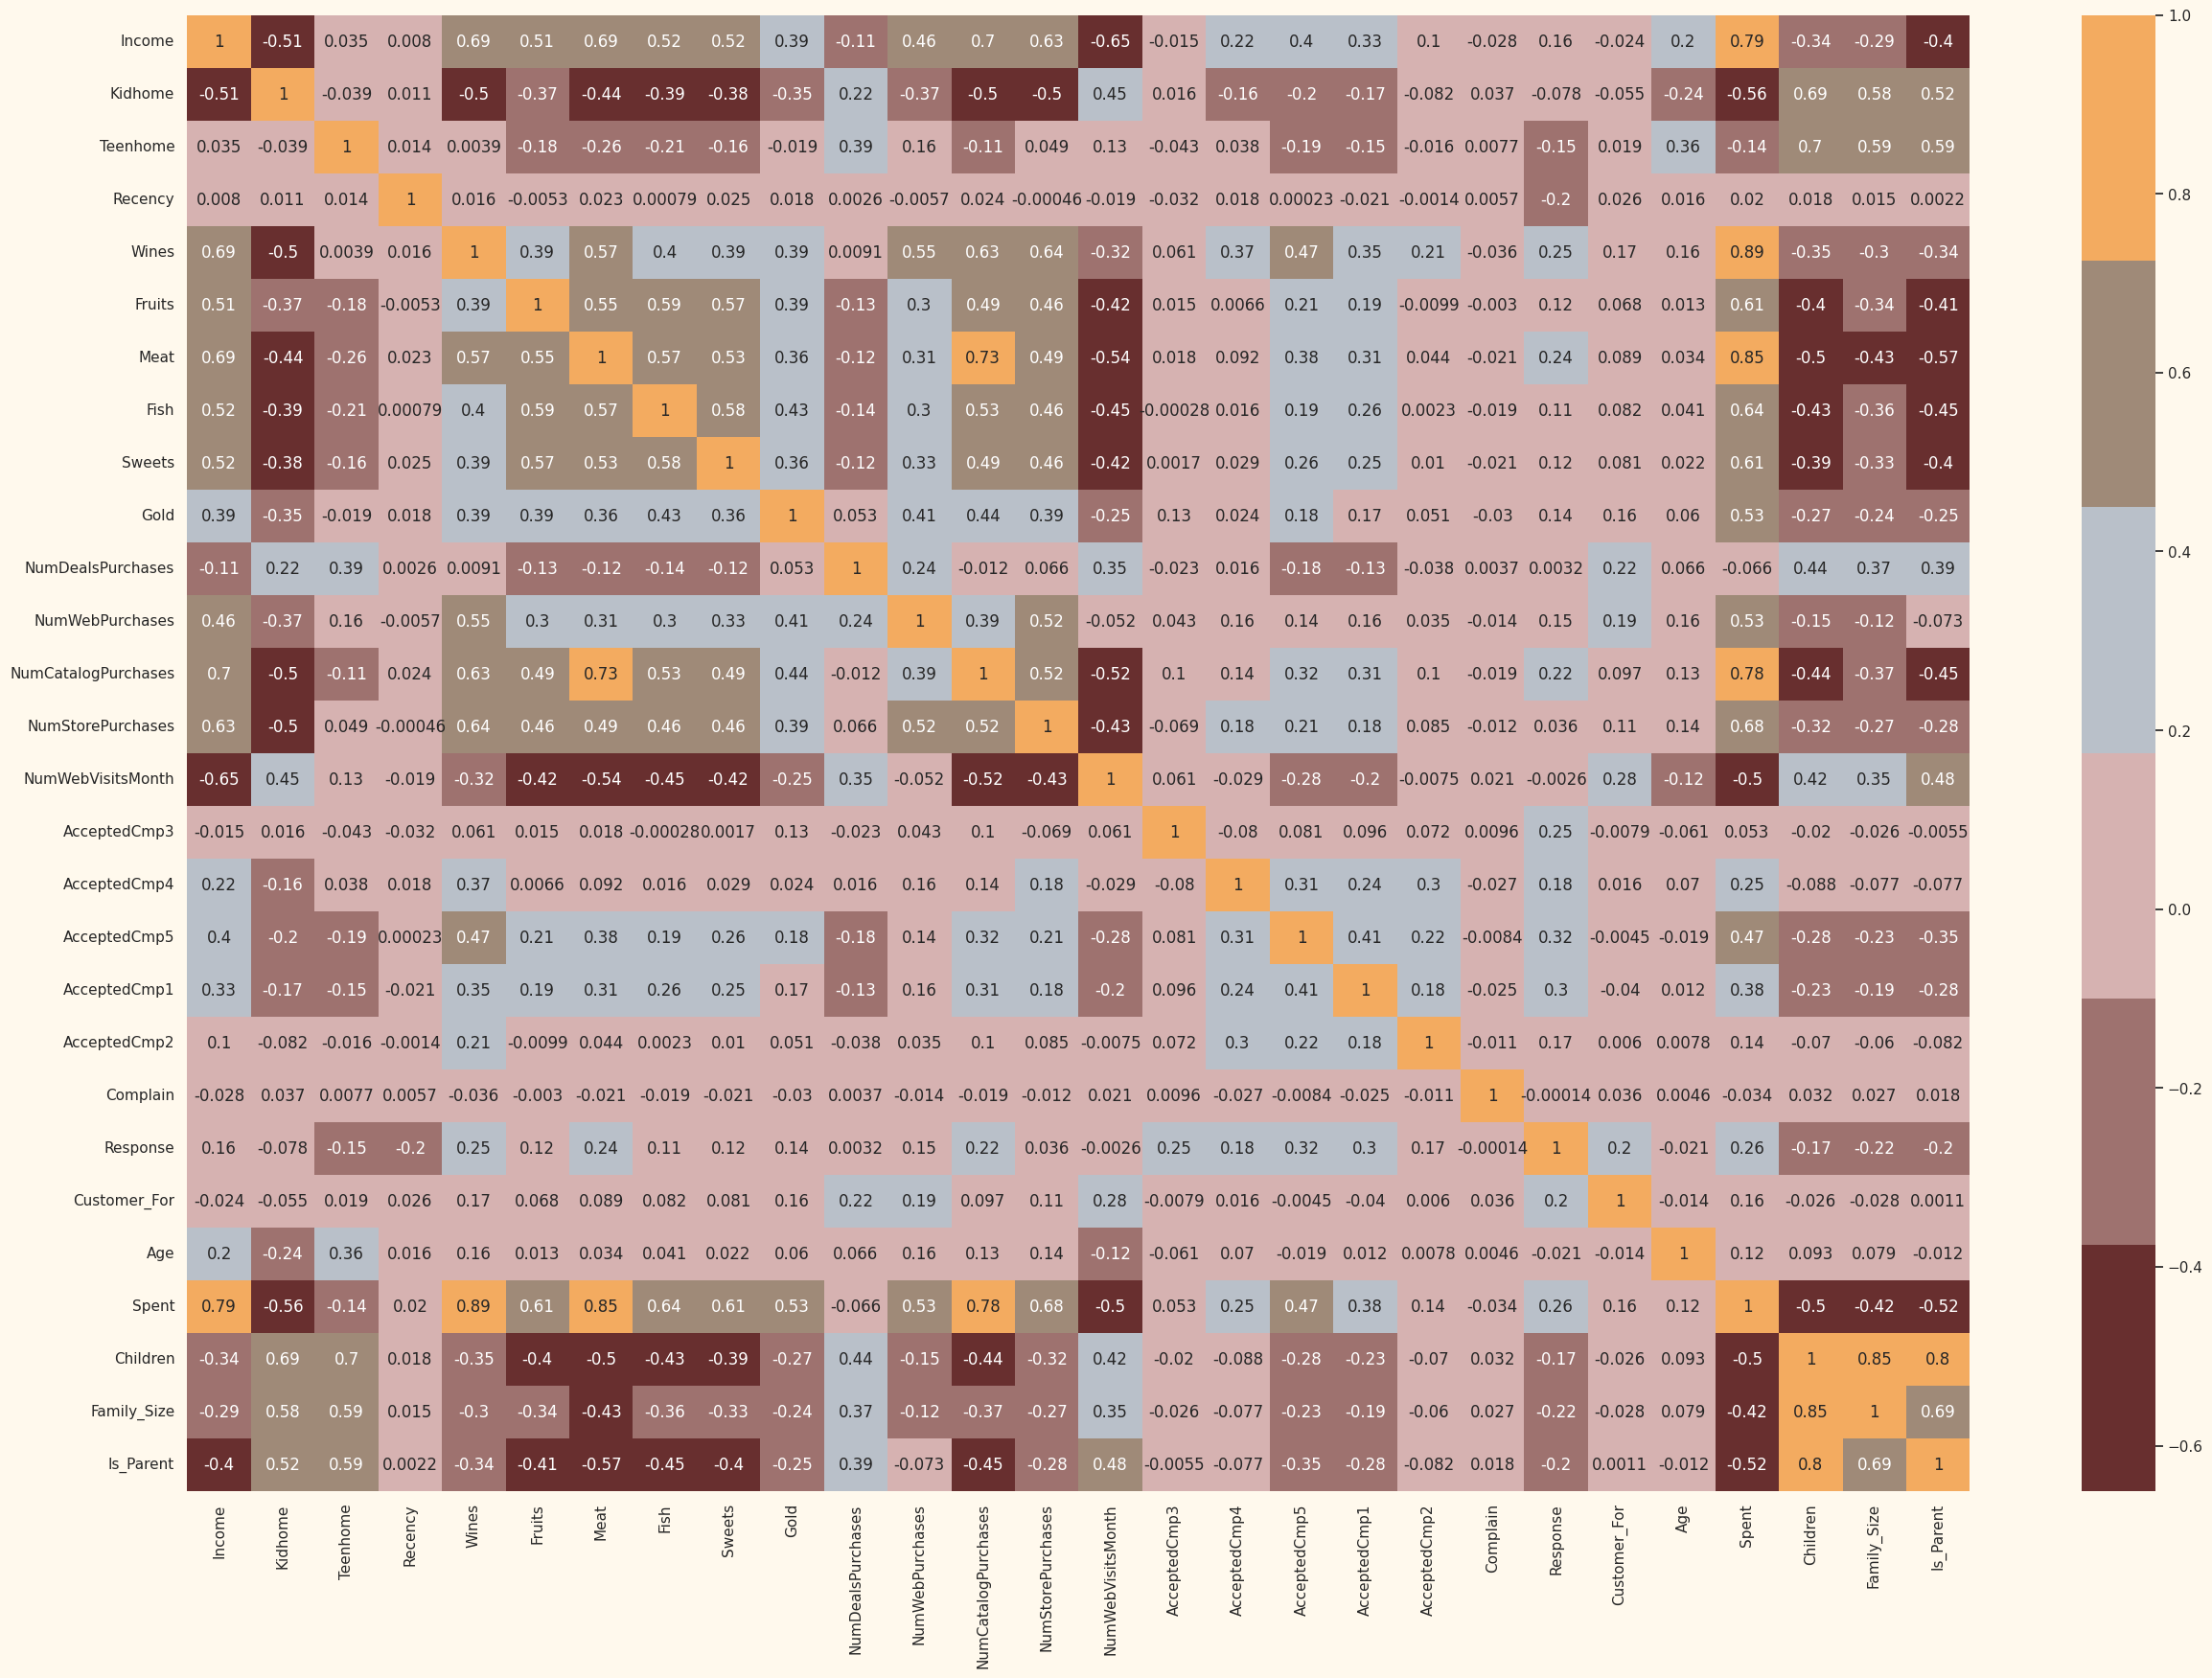

In [21]:
data_temporal=data.drop(["Education","Living_With"],axis=1)

plt.figure(figsize=(30,20))
sns.heatmap(data_temporal.corr(),annot=True,cmap=cmap)
plt.show()

**Basándonos en el mapa de calor de correlación que se ha generado, podemos observar lo siguiente:**

* **Correlaciones positivas fuertes:** Hay correlaciones positivas fuertes entre las variables relacionadas con el gasto en diferentes categorías de productos (`Wines`, `Fruits`, `Meat`, `Fish`, `Sweets`, `Gold`) y la variable `Spent` (gasto total). Esto es esperable, ya que `Spent` es la suma de estas variables individuales. También se observan correlaciones positivas entre el `Income` (ingresos) y el gasto en varios productos, especialmente en `Wines` y `Meat`. Esto sugiere que los clientes con mayores ingresos tienden a gastar más en estos productos.

* **Correlaciones negativas fuertes:** Existe una correlación negativa notable entre `Age` y `Year_Birth` (aunque `Year_Birth` se eliminó, `Age` se derivó de él). Esto es lógico, ya que a medida que aumenta el año de nacimiento, la edad disminuye. También hay correlaciones negativas entre `Kidhome`, `Teenhome`, `Children`, `Is_Parent` y el gasto en varios productos. Esto indica que tener niños o adolescentes en casa está asociado con un menor gasto en categorías como vinos, frutas, carne, etc., lo que podría deberse a prioridades de gasto diferentes en hogares con hijos.

* **Correlaciones positivas moderadas:** Observamos correlaciones positivas moderadas entre `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` y `Spent`. Esto sugiere que a medida que los clientes realizan más compras a través de diferentes canales, su gasto total aumenta.

* **Correlaciones negativas moderadas:** Hay correlaciones negativas moderadas entre `NumWebVisitsMonth` y el gasto en varios productos. Esto podría implicar que los clientes que visitan el sitio web con más frecuencia no necesariamente son los que más gastan.

* **Correlaciones débiles:** Muchas de las correlaciones son débiles, acercándose a cero. Esto indica que no hay una relación lineal clara entre esas pares de variables. Por ejemplo, la correlación entre `Recency` (recencia de la última compra) y la mayoría de las variables de gasto es relativamente baja, lo que sugiere que el tiempo desde la última compra no está fuertemente relacionado con la cantidad gastada en categorías específicas.

* **Correlaciones entre variables de promoción:** Las variables relacionadas con las campañas (`AcceptedCmp1` a `AcceptedCmp5`, `Response`) tienen correlaciones relativamente bajas entre sí y con la mayoría de las otras variables. Esto podría indicar que la aceptación de una campaña específica no está fuertemente relacionada con otras variables demográficas o de comportamiento de compra.

En resumen, el mapa de calor de correlación proporciona información valiosa sobre las relaciones lineales entre las diferentes características del cliente. Nos permite identificar qué variables tienden a moverse juntas y cuáles no. Esto es útil para comprender los patrones de comportamiento de los clientes y puede informar decisiones futuras, como la segmentación de clientes o la orientación de campañas de marketing. Por ejemplo, la fuerte correlación entre los ingresos y el gasto en ciertos productos podría sugerir dirigir promociones de productos premium a clientes de mayores ingresos. La correlación negativa con las variables `Kidhome` y `Teenhome` podría indicar la necesidad de ofrecer productos o promociones dirigidas específicamente a hogares con niños.

**Se aplican los siguientes pasos para preprocesar los datos:**

* Codificación de etiquetas de las características categóricas.
* Creación de un subconjunto de datos para la reducción de la dimensionalidad.

In [23]:
# Obtener lista de variables categóricas.
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variables categóricas en el conjunto de datos:", object_cols)

Variables categóricas en el conjunto de datos: ['Education', 'Living_With']


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Codificación de los tipos de datos object.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("Ahora todas las características son numéricas.")

Ahora todas las características son numéricas.


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [28]:
data.head(10)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,68,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,71,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,60,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,41,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,44,422,1,1,3,1
5,1,62513.0,0,1,16,520,42,98,0,42,...,0,0,0,25315200000000000,58,716,1,1,3,1
6,0,55635.0,0,1,34,235,65,164,50,49,...,0,0,0,51235200000000000,54,590,0,1,2,1
7,1,33454.0,1,0,32,76,10,56,3,1,...,0,0,0,36028800000000000,40,169,1,1,3,1
8,1,30351.0,1,0,19,14,0,24,3,3,...,0,0,1,33523200000000000,51,46,1,1,3,1
9,1,5648.0,1,1,68,28,0,6,1,1,...,0,0,0,9331200000000000,75,49,1,2,4,1


In [29]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.609855,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,...,0.013562,0.009042,0.150542,3.056091e+16,56.086347,607.268083,0.645570,0.947559,2.593128,0.714286
std,0.682635,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,...,0.115691,0.094678,0.357683,1.749556e+16,11.701599,602.513364,0.478449,0.749466,0.906236,0.451856
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,3.075840e+16,55.000000,397.000000,1.000000,1.000000,3.000000,1.000000
75%,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,1.000000,3.000000,1.000000
max,2.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,6.039360e+16,85.000000,2525.000000,1.000000,3.000000,5.000000,1.000000


**Donde:**
Living_With:
* 0: Alone
* 1: Partner


Educación:
* 0: Graduate
* 1: Postgraduate
* 2: Undergraduate

In [31]:
# "Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"
print("otal de categorías en la característica Marital_Status:\n", data["Living_With"].value_counts(), "\n")
# "Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"
print("Total de categorías en la característica Education:\n", data["Education"].value_counts())

otal de categorías en la característica Marital_Status:
 Living_With
1    1428
0     784
Name: count, dtype: int64 

Total de categorías en la característica Education:
 Education
0    1115
1     845
2     252
Name: count, dtype: int64


In [30]:
data.to_csv('marketing_campaign_processed.csv', index=False)
print("CSV file 'marketing_campaign_processed.csv' generated successfully.")

CSV file 'marketing_campaign_processed.csv' generated successfully.
